In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Boston dataset from the original source
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)

# Parse data into features and target
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])  # Combine rows for features
target = raw_df.values[1::2, 2]  # Target is in the second column of every second row

# Create DataFrame for easy handling
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
boston_data = pd.DataFrame(data, columns=columns)
boston_data["PRICE"] = target

# Display basic info and statistics
print(boston_data.info())
print(boston_data.describe())

# Features (X) and Target (y)
X = boston_data.drop("PRICE", axis=1)
y = boston_data["PRICE"]

# Handle any missing data (if applicable)
X.fillna(X.mean(), inplace=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634 

In [ ]:
Model Training 

In [3]:
from sklearn.linear_model import LinearRegression, Ridge

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Train a Ridge Regression model (you can adjust alpha for tuning)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)


Ridge()

In [ ]:
 Model Evaluation

In [4]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions for Linear Regression
y_pred_linear = linear_model.predict(X_test_scaled)

# Predictions for Ridge Regression
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Display evaluation results
print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear:.2f}")
print(f"R-squared: {r2_linear:.2f}\n")

print("Ridge Regression:")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"R-squared: {r2_ridge:.2f}")


Linear Regression:
Mean Squared Error: 24.29
R-squared: 0.67

Ridge Regression:
Mean Squared Error: 24.31
R-squared: 0.67


In [ ]:
Visualization : Correlation Heatmap

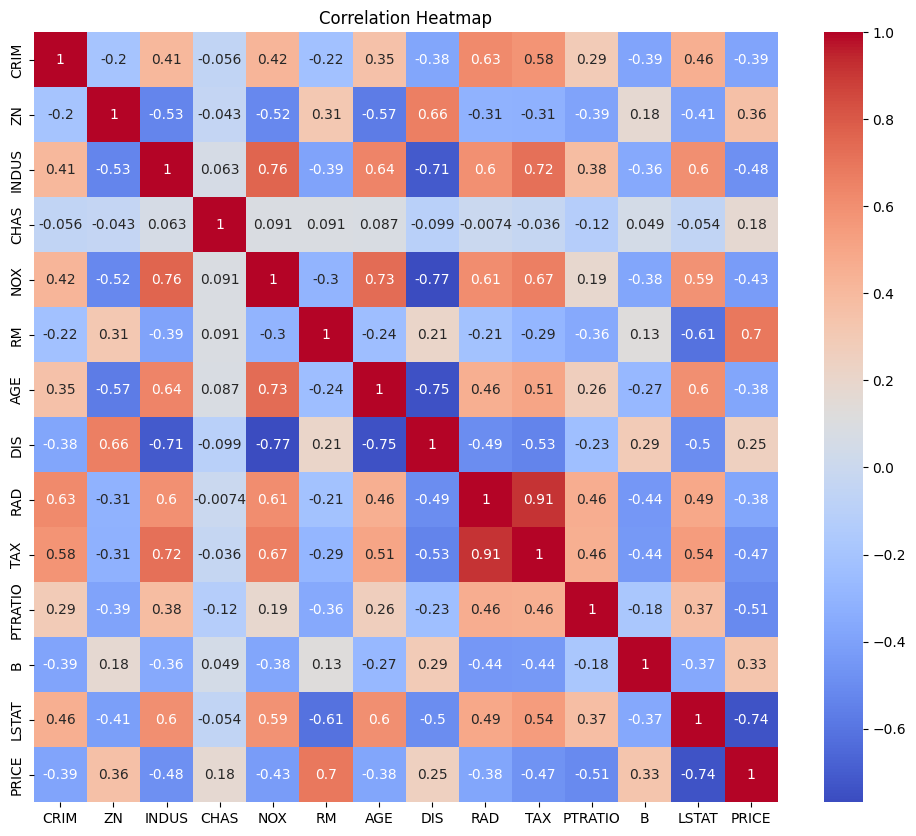

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(boston_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
Predicted vs. Actual Prices

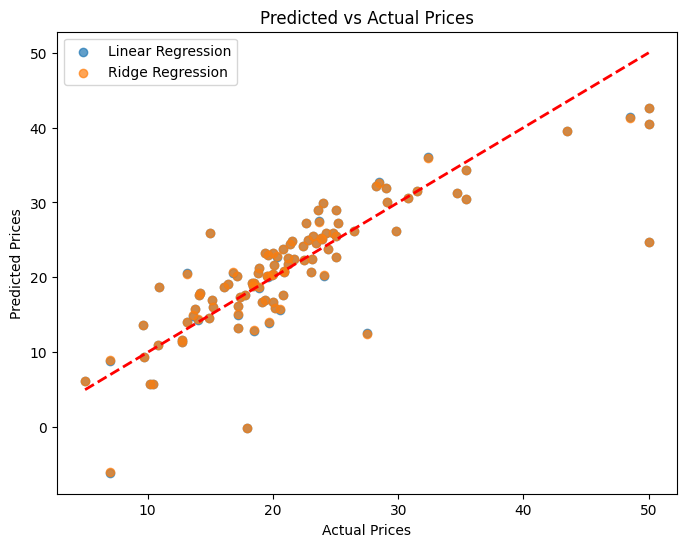

In [7]:
# Scatter plot for predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, label="Linear Regression", alpha=0.7)
plt.scatter(y_test, y_pred_ridge, label="Ridge Regression", alpha=0.7)
# Use only the 'color' argument
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color="red", linewidth=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Prices")
plt.legend()
plt.show()
